In [1]:
import pandas as pd
print(pd.__version__)

2.2.3


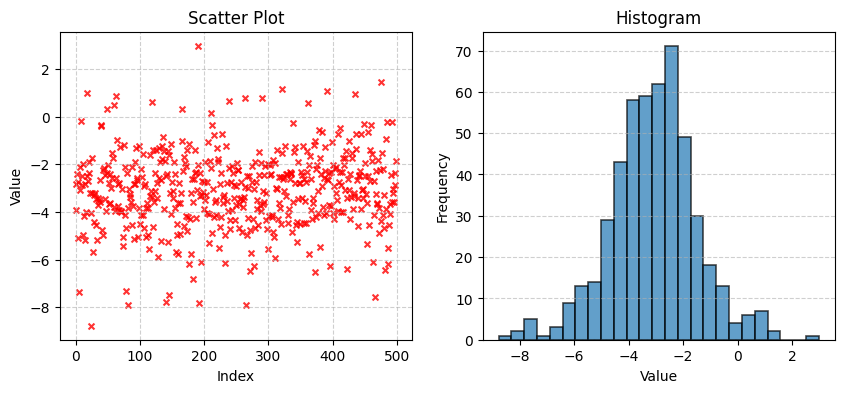

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 

df = pd.read_csv("geostat2.csv")
data = df['value']
data_sorted = sorted(data)
sample_id = np.arange(len(data))

mean = np.mean(data)
std_dev = np.std(data)
q1 = np.percentile(data_sorted, 25)
q3 = np.percentile(data_sorted, 75)
iqr = q3 - q1

bin_width = 2*(q3 - q1) / (len(data_sorted) ** (1/3))
num_bin = int(np.ceil(((max(data_sorted) - min(data_sorted)) / bin_width)))

cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# plot hist and scatter
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#scatter
axes[0].scatter(sample_id, data, color='red', label="Data Point", marker='x', alpha=0.8, s=18)
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Value")
axes[0].set_title("Scatter Plot")
axes[0].grid(True, linestyle='--', alpha=0.6)

#histogram
axes[1].hist(data, bins=num_bin, edgecolor='black', alpha=0.7, linewidth=1.2)
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram")
axes[1].grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

LOGISTIC


In [ ]:
# plot hist and scatter
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#scatter
axes[0].scatter(sample_id, data, color='red', label="Data Point", marker='x', alpha=0.8, s=18)
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Value")
axes[0].set_title("Scatter Plot")
axes[0].grid(True, linestyle='--', alpha=0.6)

#histogram
axes[1].hist(data, bins=num_bin, edgecolor='black', alpha=0.7, linewidth=1.2)
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram")
axes[1].grid(axis="y", linestyle="--", alpha=0.6)

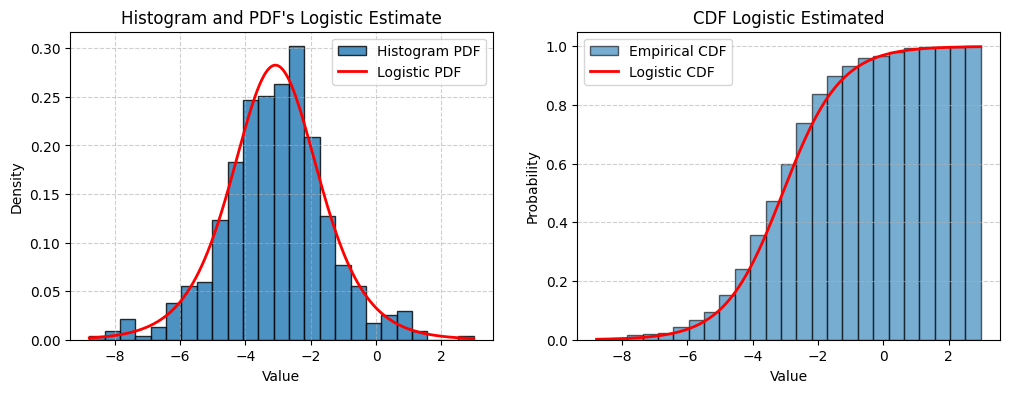

In [59]:
## LOGISTIC

mu  = mean
s = std_dev * np.sqrt(3) / np.pi
x = np.linspace(data.min(), data.max(), 500)

pdf_logistic = np.exp(-(x-mu) / s) / (s * (1 + np.exp(-(x - mu) / s)) ** 2)
cdf_logistic = 1 / (1 + np.exp(-(x - mu) / s))

# plot hist and scatter
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#pdf
axes[0].hist(data, bins=num_bin, density=True, edgecolor='black', label="Histogram PDF", alpha=0.8)
axes[0].plot(x, pdf_logistic, color='red', linewidth=2, label="Logistic PDF")   
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].set_title("Histogram and PDF's Logistic Estimate")
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

#histogram
axes[1].hist(data, bins=num_bin, density=True, cumulative=True, alpha=0.6, edgecolor='black', label="Empirical CDF")
axes[1].plot(x, cdf_logistic, color='red', linewidth=2, label="Logistic CDF")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Probability")
axes[1].set_title("CDF Logistic Estimated")
axes[1].grid(axis="y", linestyle="--", alpha=0.6)
axes[1].legend()

plt.show()


LAPLACE

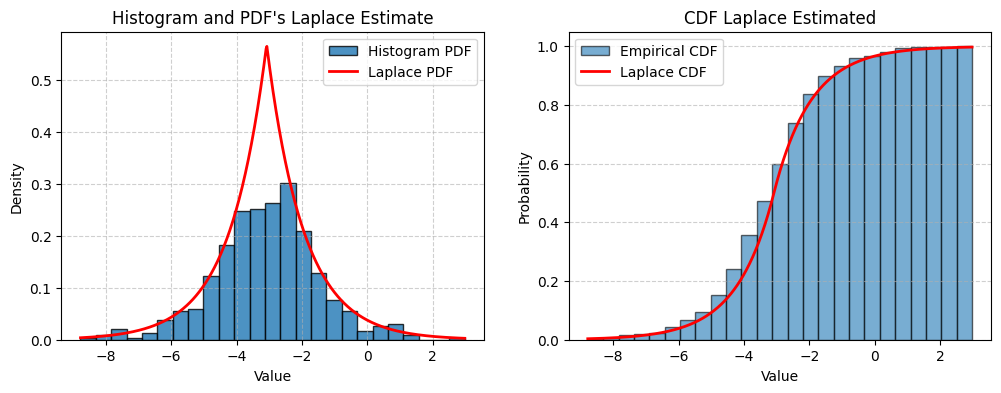

In [51]:
mu = mean
b = std_dev / np.sqrt(2)
x = np.linspace(data.min(), data.max(), 500)

pdf_laplace = (1 / 2 * b) * np.exp(-np.abs(x - mu) / b)
cdf_laplace = np.where(x <= mu, 0.5 * np.exp((x - mu) / b), 
                       1 - 0.5 * np.exp(-(x - mu) / b))

# plot hist and scatter
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#pdf
axes[0].hist(data, bins=num_bin, density=True, edgecolor='black', label="Histogram PDF", alpha=0.8)
axes[0].plot(x, pdf_laplace, color='red', linewidth=2, label="Laplace PDF")   
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].set_title("Histogram and PDF's Laplace Estimate")
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

#cdf
axes[1].hist(data, bins=num_bin, density=True, cumulative=True, alpha=0.6, edgecolor='black', label="Empirical CDF")
axes[1].plot(x, cdf_laplace, color='red', linewidth=2, label="Laplace CDF")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Probability")
axes[1].set_title("CDF Laplace Estimated")
axes[1].grid(axis="y", linestyle="--", alpha=0.6)
axes[1].legend()

plt.show()


# LOG NORMAL

C:\Users\barra\AppData\Local\Temp\ipykernel_7912\1247438800.py:1: RuntimeWarning: invalid value encountered in log
  pdf_lognormal = (1 / (x * s * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x) - mu)**2) / (2 * s**2))
C:\Users\barra\AppData\Local\Temp\ipykernel_7912\1247438800.py:2: RuntimeWarning: invalid value encountered in log
  cdf_lognormal = phi * ((np.log(x) - mu) / s)


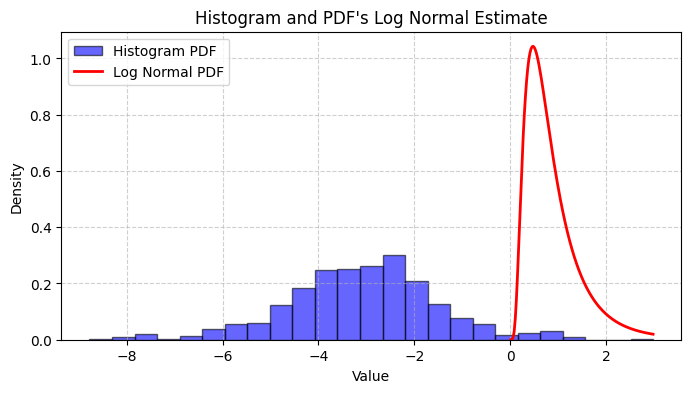

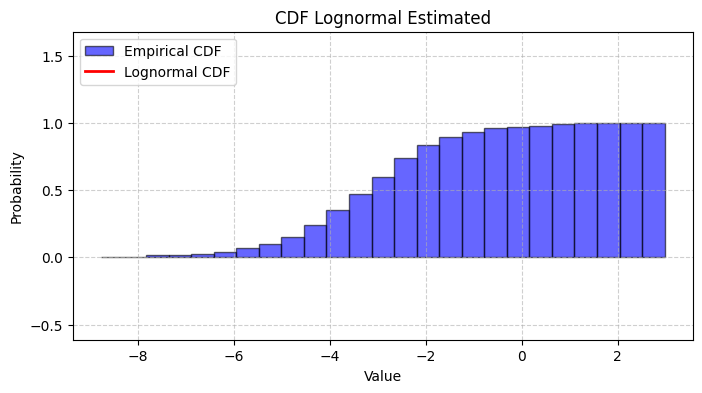

In [43]:
pdf_lognormal = (1 / (x * s * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x) - mu)**2) / (2 * s**2))
cdf_lognormal = phi * ((np.log(x) - mu) / s)

plt.figure(figsize=(8, 4))
plt.hist(data, bins=num_bin, density=True, alpha=0.6, color='blue', edgecolor='black', label="Histogram PDF")
plt.plot(x, pdf_lognormal, color='red', linewidth=2, label="Log Normal PDF")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Histogram and PDF's Log Normal Estimate")
plt.legend()
plt.grid(linestyle="--", alpha=0.6)
plt.show()

# plot CDF
plt.figure(figsize=(8, 4))
plt.hist(data_sorted, bins=num_bin, density=True, cumulative=True, alpha=0.6, color='blue', edgecolor='black', label="Empirical CDF")
plt.plot(x, cdf_lognormal, color='red', linewidth=2, label="Lognormal CDF")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.title("CDF Lognormal Estimated")
plt.legend()
plt.grid(linestyle="--", alpha=0.6)
plt.show()

##### ADUH BELOM KELARRRRRR LOG NORMAL GANTI BESOK YA

### GUMBEL

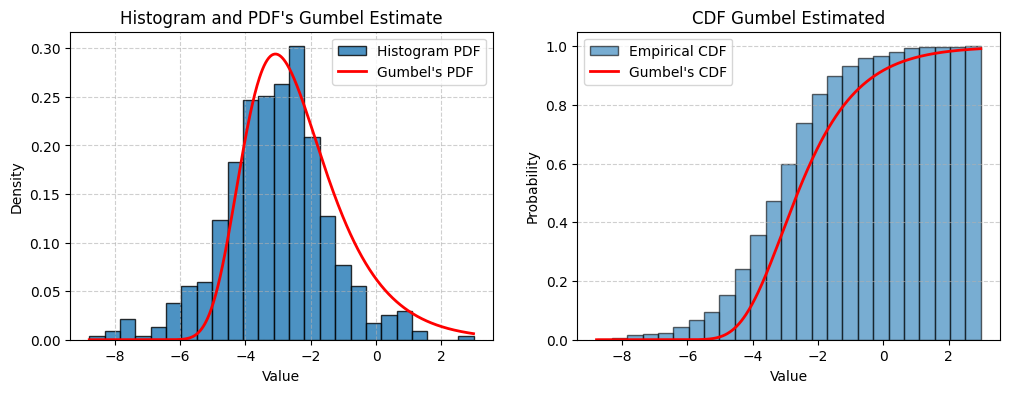

In [55]:
b = std_dev * np.sqrt(6) / (np.pi)
mu = mean
x = np.linspace(min(data), max(data), 500)
Z = (x - mu) / b # parameter tambahan untuk mempersingkat rumus

pdf_gumbel = 1 / b * np.exp(-(Z + np.exp(-Z)))
cdf_gumbel = np.exp(-np.exp(-Z))

# plot hist and scatter
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#pdf
axes[0].hist(data, bins=num_bin, density=True, edgecolor='black', label="Histogram PDF", alpha=0.8)
axes[0].plot(x, pdf_gumbel, color='red', linewidth=2, label="Gumbel's PDF")   
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].set_title("Histogram and PDF's Gumbel Estimate")
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

#cdf
axes[1].hist(data, bins=num_bin, density=True, cumulative=True, alpha=0.6, edgecolor='black', label="Empirical CDF")
axes[1].plot(x, cdf_gumbel, color='red', linewidth=2, label="Gumbel's CDF")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Probability")
axes[1].set_title("CDF Gumbel Estimated")
axes[1].grid(axis="y", linestyle="--", alpha=0.6)
axes[1].legend()
plt.show()


WEIBULL

In [17]:
# before we start weibull n dagum, data perlu dishifting agar hasilnya lebih sesuai. 

data_shifted = data + 9 # agar posisi dimulai dari 0
mean_shifted = np.mean(data_shifted)
Q1_shifted = np.percentile(data_shifted, 25)    
Q3_shifted = np.percentile(data_shifted, 75)        
bin_width_shifted = 2 * (Q3_shifted - Q1_shifted) / (3 * np.sqrt(mean_shifted))     
num_bin_shifted = int(np.ceil(((max(data_shifted) - min(data_shifted)) / bin_width_shifted)))       


## WEIBULLL

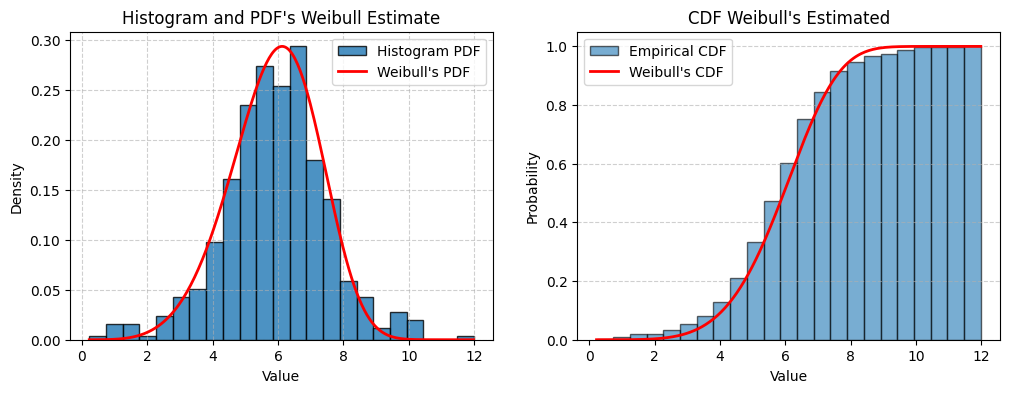

In [ ]:
k = 5 
lamda = np.median(data_shifted) / (np.log(2) ** (1/k))  
x = np.linspace(data_shifted.min(), data_shifted.max(), 300)

# PDF weibull 
pdf_weibull = np.where(x < 0, 0, (k / lamda) * ((x / lamda) ** (k - 1)) * np.exp(- (x / lamda) ** k))

# CDF weibull 
cdf_weibull = np.where(x < 0, 0, 1 - np.exp(- (x / lamda) ** k))

# plot hist and scatter
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#pdf
axes[0].hist(data_shifted, bins=num_bin_shifted, density=True, edgecolor='black', label="Histogram PDF", alpha=0.8)
axes[0].plot(x, pdf_weibull, color='red', linewidth=2, label="Weibull's PDF")   
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].set_title("Histogram and PDF's Weibull Estimate")
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

#cdf
axes[1].hist(data_shifted, bins=num_bin_shifted, density=True, cumulative=True, alpha=0.6, edgecolor='black', label="Empirical CDF")
axes[1].plot(x, cdf_weibull, color='red', linewidth=2, label="Weibull's CDF")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Probability")
axes[1].set_title("CDF Weibull's Estimated")
axes[1].grid(axis="y", linestyle="--", alpha=0.6)
axes[1].legend()
plt.show()


## DAGUM

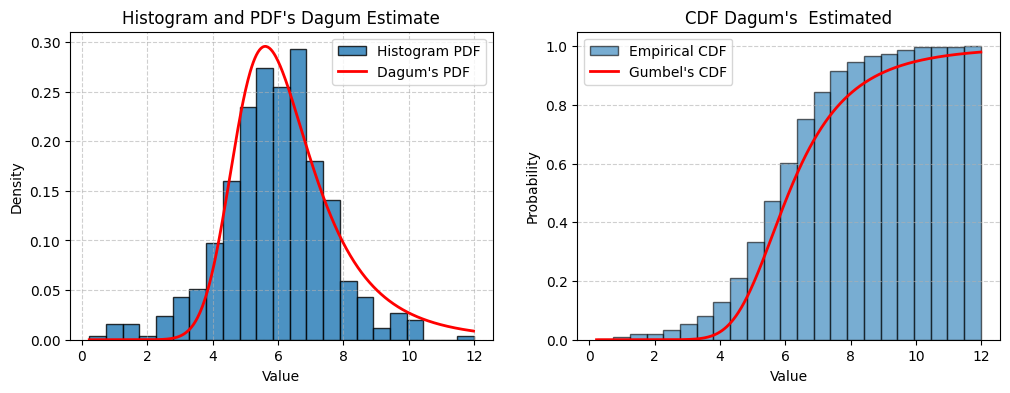

In [58]:
a = 5.5
b = np.percentile(data_shifted, 25)
c = 2.5
x = np.linspace(data_shifted.min(), data_shifted.max(), 500)

pdf_dagum = np.where(x < 0, 0, (a*c / x) * ((x/b)**(a*c) / (((x/b)**a) + 1) ** (c + 1)))

# CDF dagum
cdf_dagum = np.where(x < 0, 0, (1 + (x / b) ** -a) ** -c)

# plot hist and scatter
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#pdf
axes[0].hist(data_shifted, bins=num_bin_shifted, density=True, edgecolor='black', label="Histogram PDF", alpha=0.8)
axes[0].plot(x, pdf_dagum, color='red', linewidth=2, label="Dagum's PDF")   
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].set_title("Histogram and PDF's Dagum Estimate")
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

#cdf
axes[1].hist(data_shifted, bins=num_bin_shifted, density=True, cumulative=True, alpha=0.6, edgecolor='black', label="Empirical CDF")
axes[1].plot(x, cdf_dagum, color='red', linewidth=2, label="Gumbel's CDF")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Probability")
axes[1].set_title("CDF Dagum's  Estimated")
axes[1].grid(axis="y", linestyle="--", alpha=0.6)
axes[1].legend()
plt.show()



## Cauchy

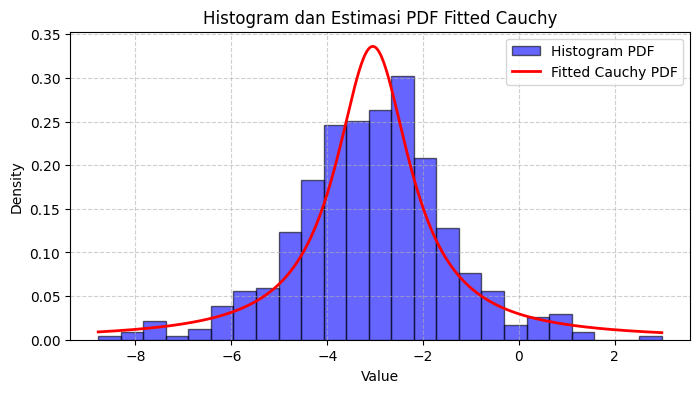

In [ ]:
x0 = np.median(data_sorted)
gamma = (q3 - q1) / 2
x = np.linspace(data.min(), data.max(), 500)

pdf_fitted_cauchy = 1 / (np.pi * gamma * (1 + ((x - x0) / gamma) ** 2))

# CDF fitted cauchy
cdf_fitted_cauchy = 0.5 + np.arctan((x - x0) / gamma) / np.pi

# plot PDF
plt.figure(figsize=(8, 4))
plt.hist(data, bins=num_bin, density=True, alpha=0.6, color='blue', edgecolor='black', label="Histogram PDF")
plt.plot(x, pdf_fitted_cauchy, color='red', linewidth=2, label="Fitted Cauchy PDF")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Histogram dan Estimasi PDF Fitted Cauchy")
plt.legend()
plt.grid(linestyle="--", alpha=0.6)
plt.show()

## MoM dan MLE

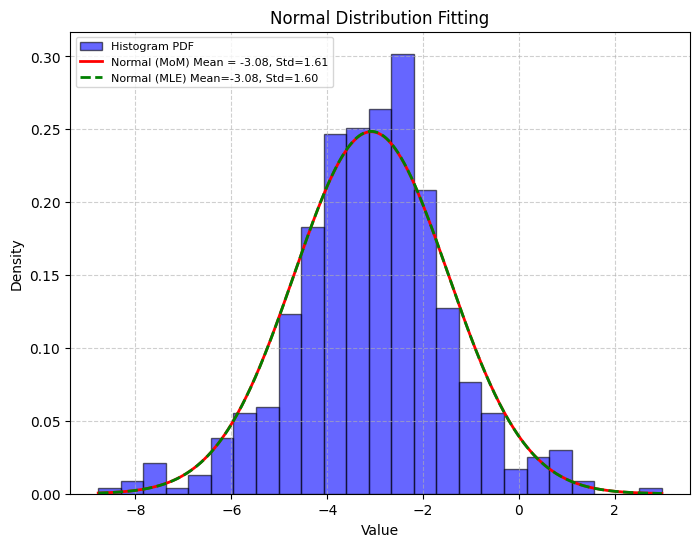

In [67]:
x = np.linspace(data.min(), data.max(), 500)
MOM_sigma2 = np.var(data, ddof=1)
MLE_sigma2 = np.var(data, ddof=0)

def normal_pdf(x, mean, sigma2):
    return(1 / np.sqrt(2 * np.pi * sigma2)) * np.exp(-((x - mean)**2) / (2 * sigma2))

pdf_MOM = normal_pdf(x, mean, MOM_sigma2)
pdf_MLE = normal_pdf(x, mean, MLE_sigma2)

# plot PDF
plt.figure(figsize=(8, 6))
plt.hist(data, bins=num_bin, density=True, alpha=0.6, color='blue', edgecolor='black', label="Histogram PDF")
plt.plot(x, pdf_MOM, color='red', linewidth=2, linestyle="-", label=f"Normal (MoM) Mean = {mean:.2f}, Std={np.sqrt(MOM_sigma2):.2f}")
plt.plot(x, pdf_MLE, color='green', linewidth=2, linestyle="--", label=f"Normal (MLE) Mean={mean:.2f}, Std={np.sqrt(MLE_sigma2):.2f}")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Normal Distribution Fitting")
plt.legend(loc="upper left", fontsize=8)
plt.grid(linestyle="--", alpha=0.6)
plt.show()
